In [17]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", 400)

from utils import *



import warnings
warnings.filterwarnings("ignore")



# Data Exploration

In [18]:
train_df = pd.read_csv('train.csv')
train_df.drop(['Unnamed: 0'], axis =1 , inplace = True)
test_df = pd.read_csv('test.csv')

display(train_df.head())
display('train_df shape:', train_df.shape)
print()
display('test_df shape:', test_df.shape)
display(test_df.head())


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

'train_df shape:'

(13730, 166)

'test_df shape:'

(4576, 47)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [19]:
# train dataset contains test features ?
if set(test_df.columns).issubset(set(train_df.columns)) == True:
    print('train dataset contains all test features')
else:
    print('train dataset does not contain all test features')

train dataset contains all test features


In [20]:
# test_df columns 
test_df.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

Let's set both data frame with the same features (training set will have the NU_NOTA_MT column though) 

In [21]:
# Y 
Y_math_grade = train_df.NU_NOTA_MT

#X
x_train = train_df.loc[:, test_df.columns] # all test_df columns 
x_train['NU_NOTA_MT'] = Y_math_grade # Add NU_NOTA_MT at the end of the df

display('train_subset_df shape:',x_train.shape)

x_train.head()

'train_subset_df shape:'

(13730, 48)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


In [22]:
# Unique value per feature
unique_dict = {}    
for feature in x_train.columns[1:]:    
    unique_dict[feature] = x_train[feature].unique()
    
unique_dict   

{'CO_UF_RESIDENCIA': array([43, 23, 33, 13, 29, 51, 26, 31, 21, 24, 50, 41, 15, 53, 52, 32, 35,
        42, 22, 17, 16, 25, 11, 28, 27, 12, 14]),
 'SG_UF_RESIDENCIA': array(['RS', 'CE', 'RJ', 'AM', 'BA', 'MT', 'PE', 'MG', 'MA', 'RN', 'MS',
        'PR', 'PA', 'DF', 'GO', 'ES', 'SP', 'SC', 'PI', 'TO', 'AP', 'PB',
        'RO', 'SE', 'AL', 'AC', 'RR'], dtype=object),
 'NU_IDADE': array([24, 17, 21, 25, 28, 18, 16, 29, 27, 19, 20, 30, 22, 15, 40, 23, 37,
        32, 38, 26, 42, 44, 34, 48, 31, 52, 43, 36, 45, 39, 57, 33, 49, 35,
        47, 46, 14, 51, 59, 56, 50, 41, 65, 55, 54, 53, 62, 63, 67, 61, 60,
        64, 58, 66, 13]),
 'TP_SEXO': array(['M', 'F'], dtype=object),
 'TP_COR_RACA': array([1, 3, 0, 2, 4, 5]),
 'TP_NACIONALIDADE': array([1, 2, 3, 4, 0]),
 'TP_ST_CONCLUSAO': array([1, 2, 3, 4]),
 'TP_ANO_CONCLUIU': array([ 4,  0,  9,  1,  8,  7,  2,  6, 10,  5,  3]),
 'TP_ESCOLA': array([1, 2, 3, 4]),
 'TP_ENSINO': array([nan,  1.,  3.,  2.]),
 'IN_TREINEIRO': array([0, 1]),
 'TP_DEPE

Now we have an idea regarding the possible values of each feature. I noticed that some of them are either ordinal or categorical. I have to numerically encode them. In addition to that, not surprisingly, many features are unbalanced. For example, the feature TP_NACIONALIDADE (NACIONALITY).

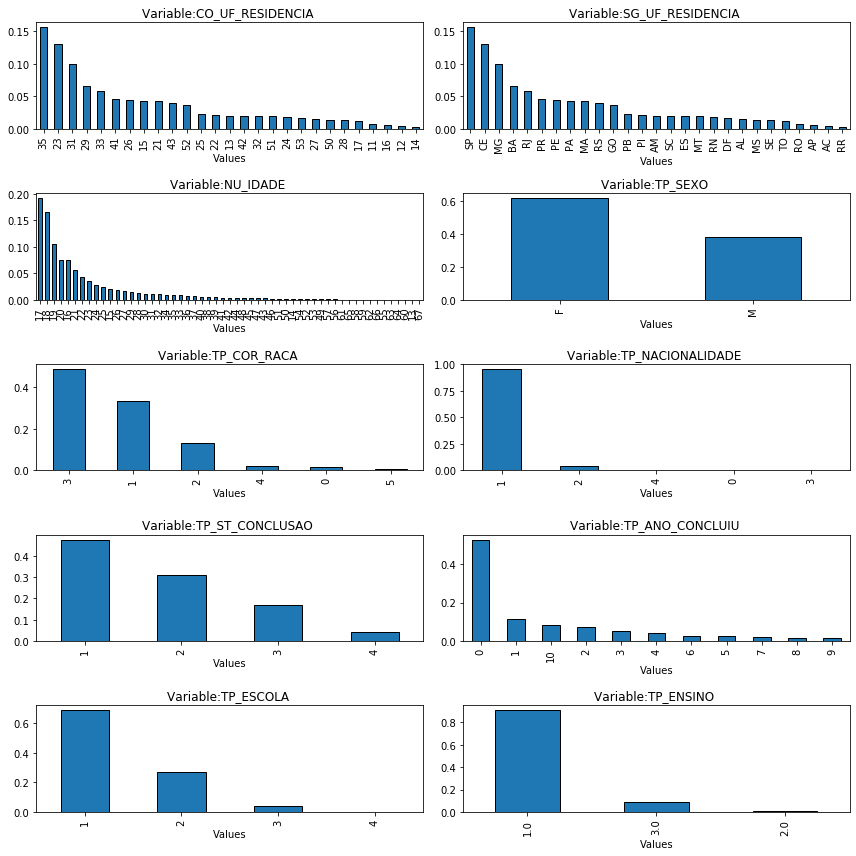

In [23]:
from utils import bar_plot
bar_plot(x_train, 
          len(x_train.columns[1:11]),
          x_train.columns[1:11],
          5,
          2)

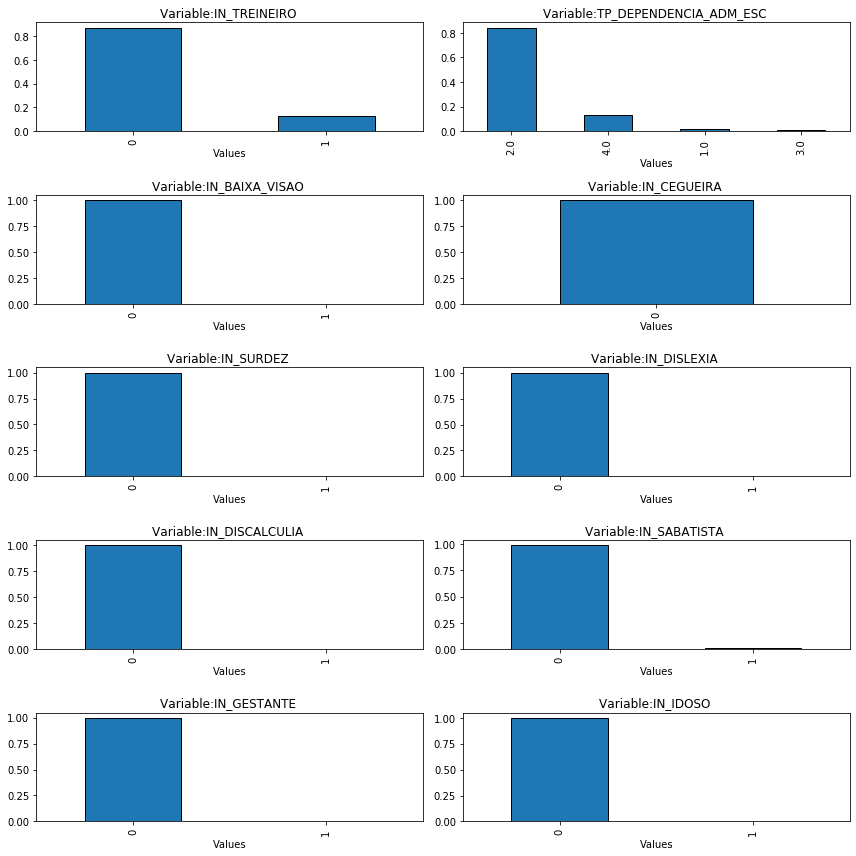

In [24]:
bar_plot(x_train, 
          len(x_train.columns[11:21]),
          x_train.columns[11:21],
          5,
          2)

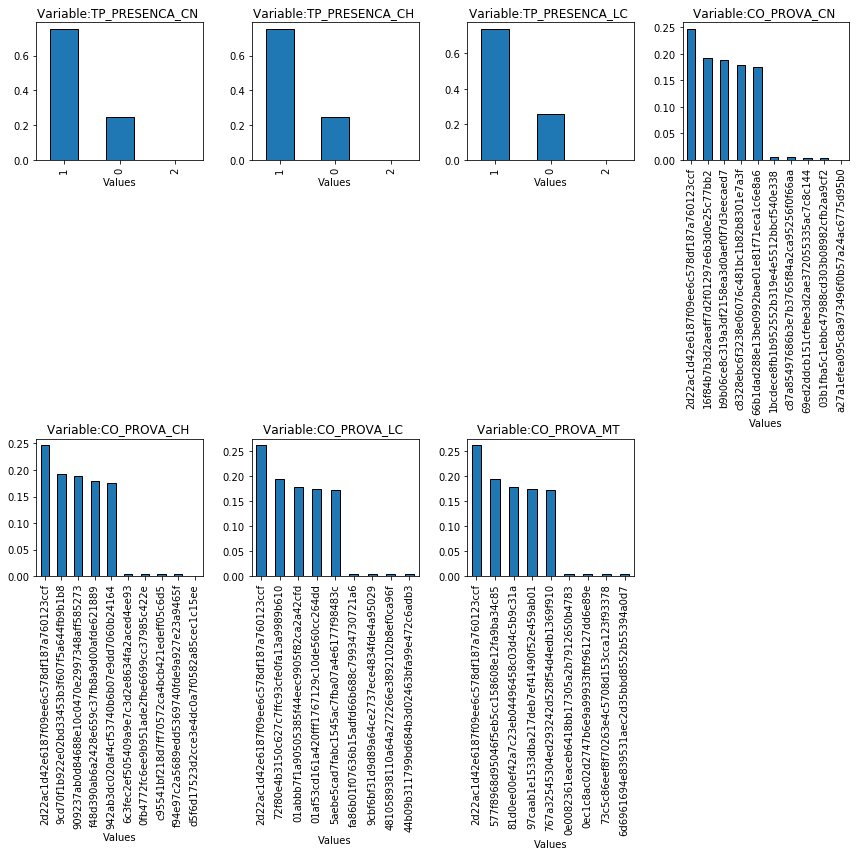

In [25]:
bar_plot(x_train, 
          len(x_train.columns[21:28]),
          x_train.columns[21:28],
          2,
          4)

In [26]:
x_train.NU_NOTA_CN.value_counts()

416.4    17
417.2    16
442.7    15
438.7    14
439.6    14
         ..
616.6     1
626.2     1
692.3     1
482.8     1
344.8     1
Name: NU_NOTA_CN, Length: 2692, dtype: int64

In [27]:
x_train.NU_NOTA_LC.value_counts()

551.5    17
540.3    16
516.2    15
528.2    14
569.4    13
         ..
519.1     1
367.7     1
707.6     1
676.5     1
364.9     1
Name: NU_NOTA_LC, Length: 2774, dtype: int64

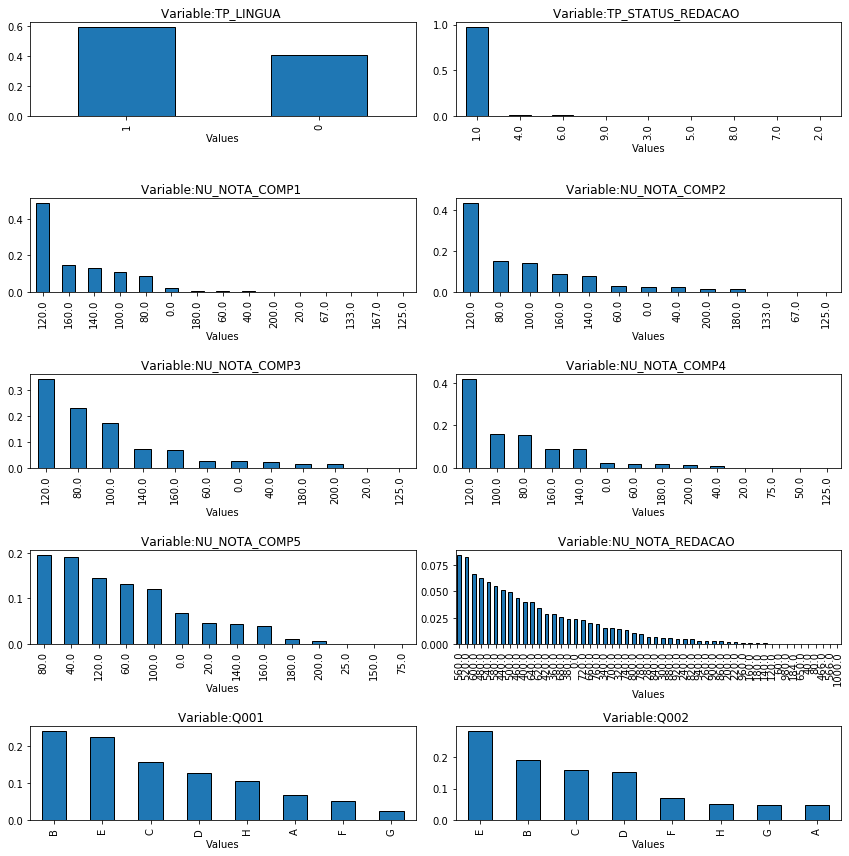

In [28]:
bar_plot(x_train, 
          len(x_train.columns[31:41]),
          x_train.columns[31:41],
          5,
          2)

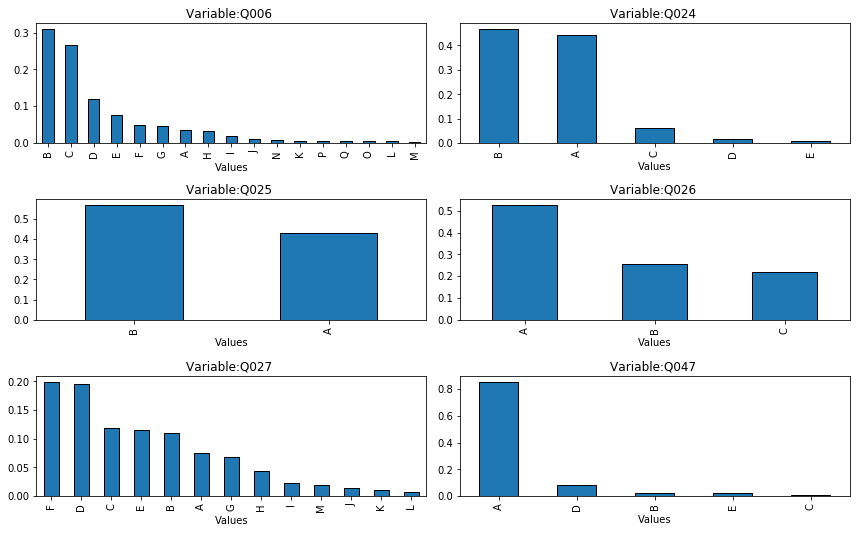

In [29]:
bar_plot(x_train, 
          len(x_train.columns[41:47]),
          x_train.columns[41:47],
          5,
          2)

### numbe of missing values: 
- Columns

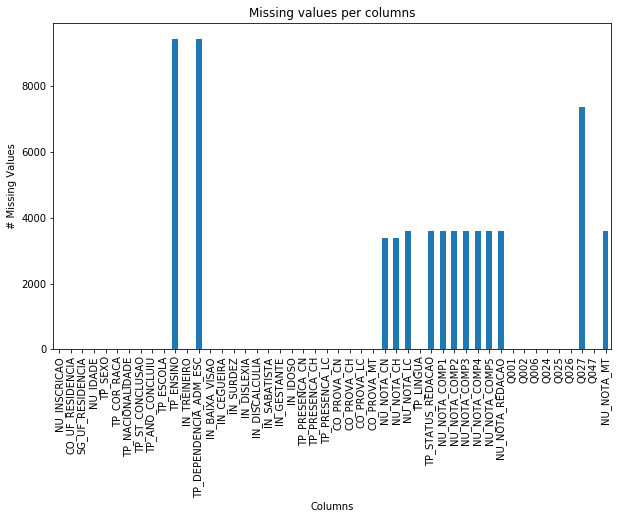

In [30]:
x_train.isnull().sum().plot(kind = 'bar', figsize = (10,6))
plt.title('Missing values per columns')
plt.xlabel('Columns')
plt.ylabel('# Missing Values');

### Count and percentage of columns with missing values only

- TP_ENSINO : Tipo de instituição que concluiu ou concluirá o Ensino Médio 
- TP_DEPENDENCIA_ADM_ESC - Dependência administrativa (Escola)
- NU_NOTA_CN - Nota da prova de Ciências da Natureza
- NU_NOTA_CH - Nota da prova de Ciências Humanas
- NU_NOTA_LC - Nota da prova de Linguagens e Códigos
- TP_STATUS_REDACAO - Situação da redação do participante
- NU_NOTA_COMP1 - Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
- NU_NOTA_COMP2 - Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
- NU_NOTA_COMP3 - Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista
- NU_NOTA_COMP4	- Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
- NU_NOTA_COMP5 - Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.
- NU_NOTA_REDACAO - Nota da prova de redação
- Q027 - Com que idade você começou a exercer uma atividade remunerada?


In [31]:
from utils import missing_data_columns_df
missing_data = missing_data_columns_df(x_train)
missing_data


,Missing_Count,Pct_missing
TP_ENSINO,9448,68.81
TP_DEPENDENCIA_ADM_ESC,9448,68.81
NU_NOTA_CN,3389,24.68
NU_NOTA_CH,3389,24.68
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP1,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20


We can see a pattern for those columns related to grades (NOTA). Almost all of them have 3597 missing values. Based on that I will assume that those candidates have not attended to the exam so I can drop them from our dataframe.

The features **TP_ENSINO** , **TP_DEPENDENCIA_ADM_ESC**  and **Q027** have more that 68% and 53% of missing value respectively. That way, they do not give us much information (I will drop them) 


In [32]:
drop_columns = ['TP_ENSINO', 
                'TP_DEPENDENCIA_ADM_ESC',
                 'Q027']

#Drop above columns of the train dataframe and display missing data df
missing_data = missing_data_columns_df(x_train,
                                       drop_columns,
                                       drop_columns= True)

missing_data



,Missing_Count,Pct_missing
NU_NOTA_CN,3389,24.68
NU_NOTA_CH,3389,24.68
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP1,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20
NU_NOTA_COMP5,3597,26.20
NU_NOTA_REDACAO,3597,26.20


The variables **NU_NOTA_CN** and **NU_NOTA_CH** are intriguing regarding their missing value patterns. I am not really sure why their total missing value are different from those I have just dropped. I would say that some candidates may have decided just no to do some tests or questions. Those missing value should be more investigated.
        
    

### numbe of missing values: 
- Rows

In [33]:
missing_data

,Missing_Count,Pct_missing
NU_NOTA_CN,3389,24.68
NU_NOTA_CH,3389,24.68
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP1,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20
NU_NOTA_COMP5,3597,26.20
NU_NOTA_REDACAO,3597,26.20


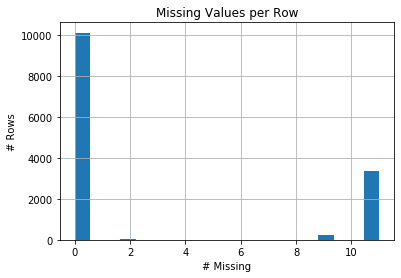

In [34]:
x_train.isnull().sum(axis = 1).hist(bins = 20)
plt.title('Missing Values per Row');
plt.xlabel('# Missing')
plt.ylabel('# Rows');

In [35]:
# Split dataframe 
df_new = x_train.copy()

df_low_missing = df_new.dropna(thresh= 40) # Keep only the rows with at least 40 non-NA values


df_high_missing = df_new[~df_new.index.isin(df_low_missing.index)]

df_low_missing.shape, df_high_missing.shape

((10133, 45), (3597, 45))

In [36]:
columns = ['TP_SEXO', 'SG_UF_RESIDENCIA','TP_ESCOLA','Q001' ,'Q047','Q002']

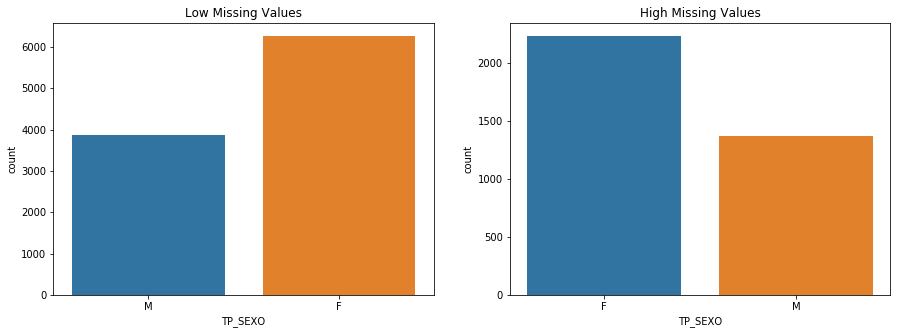

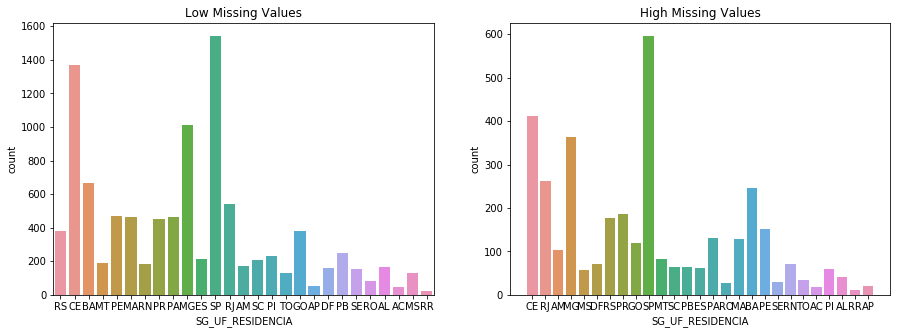

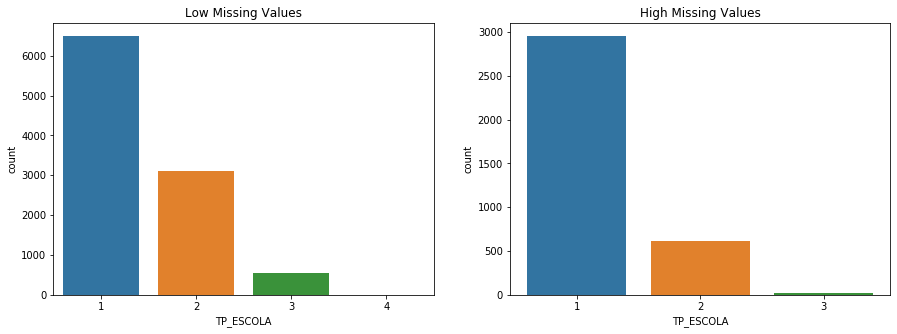

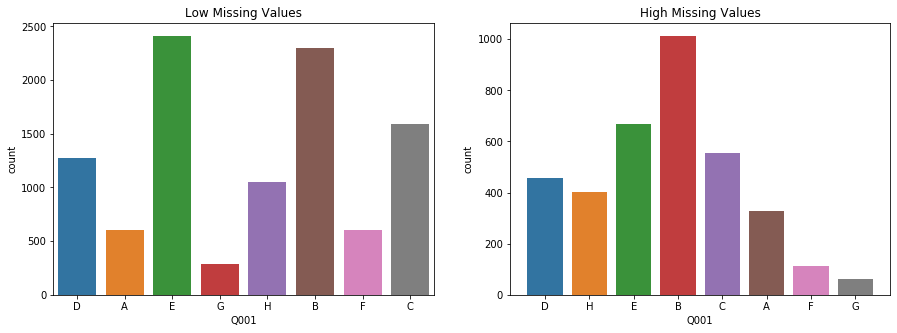

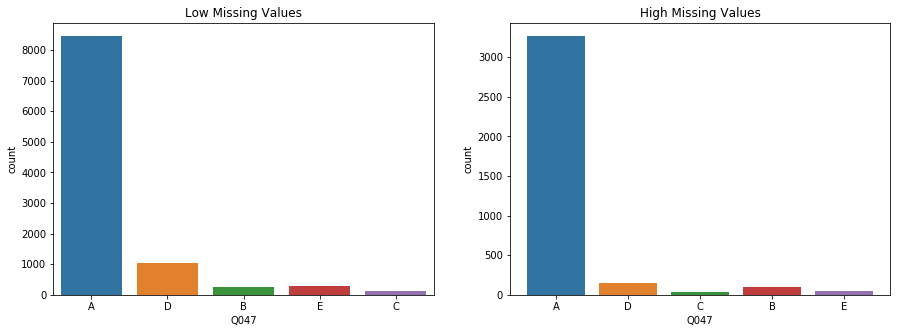

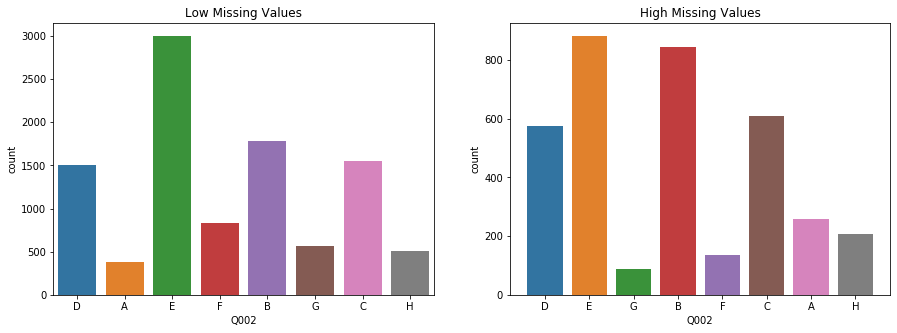

In [37]:
from utils import compare_df_plot
compare_df_plot(df_low_missing , df_high_missing ,columns)


We can notice that some features have distribution completely different from the dataframe with smaller amount of missing value.This suggests that these two groups are different from one another.Based on that, from now on, I will keep working with the low_missing_values data frame.

In [38]:
x_train = df_low_missing.copy()

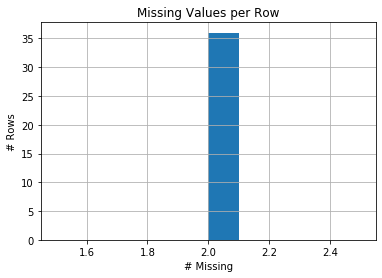

In [39]:
x_train.isnull().sum(axis = 1)[x_train.isnull().sum(axis = 1) != 0].hist()
plt.title('Missing Values per Row');
plt.xlabel('# Missing')
plt.ylabel('# Rows');

First, I will fill the missing values with the median and see how the model reacts to it. Them I will just drop those missing values and compare the performance.

In [40]:
x_train = df_low_missing
x_train.NU_NOTA_CN = x_train.NU_NOTA_CN.fillna(x_train.NU_NOTA_CN.median())
x_train.NU_NOTA_CH =  x_train.NU_NOTA_CH.fillna(x_train.NU_NOTA_CH.median())


'x_train shape:'

(10133, 45)

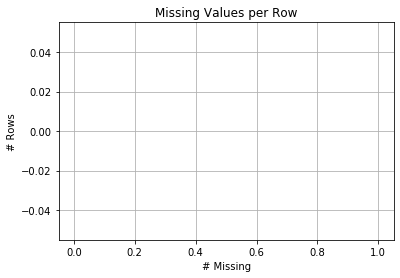

In [41]:
#After process

x_train.isnull().sum(axis = 1)[x_train.isnull().sum(axis = 1) != 0].hist()
plt.title('Missing Values per Row');
plt.xlabel('# Missing')
plt.ylabel('# Rows');
display('x_train shape:',x_train.shape)

# Feature engineering

Now we have to encode all those categorical/ordinal featues.

Features to re-encode: 
- **SG_UF_RESIDENCE** - 27 categories - Sigla da Unidade da Federação de residência 
- **TP_SEXO** - 2 categories
- **CO_PROVA_CN** - 10 categories
- **CO_PROVA_CH** - 10 categories
- **CO_PROVA_LC** - 9 categories
- **CO_PROVA_MT** - 9 categories
- **Q001** - 8 categories- Até que série seu pai, ou o homem responsável por você, estudou?
- **Q002** - 8 categories - Até que série sua mãe, ou a mulher responsável por você, estudou?
- **Q006** - 17 categories - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
- **Q024** - 5 categories - Na sua residência tem computador?
- **Q025** - 2 categories - Na sua residência tem acesso à Internet?
- **Q026** - 3 categories - Você exerce ou já exerceu atividade remunerada?
- **Q047** - 5 categories - Em que tipo de escola você frequentou o Ensino Médio?



I noticed that for all ordinary features the lowest level of their categories is always A. For example **Q001**, A means that the father of the candidate has no education at all. Because of that I will rank them numerically. 

For those nominal variable with high cardinality ( **SG_UF_RESIDENCE**, **Q006**, **Q027**) I will apply one hot encode for the top 10 most frequent categories and consider the remaining ones as noise.

The binary variables will be re-encoded to 0 and 1 and the variables with low cardinality I will apply one hot encode.


In [42]:
from utils import feature_engineering_encode

In [43]:
df_dummies = feature_engineering_encode(x_train)
df_dummies.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q024,Q025,Q026,Q047,NU_NOTA_MT,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_GO,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_A,Q006_I,Q006_J,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,1,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,3,0,0,2,0,399.4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,0,0,0,0,459.8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,18,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,4,4,1,1,0,0,364.5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,18,0,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,4,3,1,1,2,0,529.2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,18,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,6,5,1,1,0,3,566.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0

In [44]:
df_dummies.NU_NOTA_MT

0        399.4
1        459.8
5        364.5
6        529.2
7        566.7
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 10133, dtype: float64

In [45]:
Y = df_dummies.NU_NOTA_MT

df_dummies.drop('NU_NOTA_MT', axis = 1, inplace = True)

In [46]:
train_NU_INSCRICAO = df_dummies.NU_INSCRICAO
df_dummies.drop('NU_INSCRICAO', axis = 1, inplace = True)

##  Base line model

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR 

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import learning_curve


from sklearn.model_selection import  KFold, cross_val_score

In [48]:
seed = 42

In [166]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    
    'RandromForest': RandomForestRegressor(random_state = seed),
    #'GradientBoost': GradientBoostingRegressor(random_state = seed),
    'BagginRegressor': BaggingRegressor(random_state = seed),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state = seed),

    'SVM' : SVR()
}

for key, model in models.items():
    score = cross_val_score(model, df_dummies, Y, cv=10, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score)
    rmse_score = round(np.mean(rmse), 2)
    print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))


RMSE score with CV of Linear Regression is 4867530215.21
RMSE score with CV of Lasso is 74.98
RMSE score with CV of Ridge is 74.58
RMSE score with CV of ElasticNet is 75.54
RMSE score with CV of RandromForest is 76.75
RMSE score with CV of BagginRegressor is 76.56
RMSE score with CV of GradientBoostingRegressor is 72.0
RMSE score with CV of SVM is 102.05


In [167]:
df_dummies.shape

(10133, 93)

# Feature selection 

there are 93 features in the dataset and this may be cumbersome for training our model. I will perform a featue selection in order to determine the best 10 features only. 

In this case I will use the f_regression univariate feature selection test. This test calculates the correlation between each regressor and the target variable, than convert to an F score then to a p-value. 



Top 10 features:



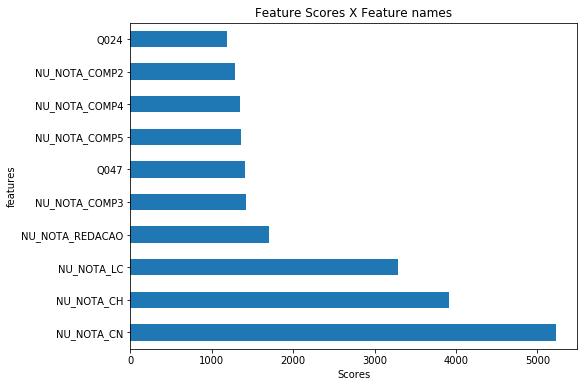

In [77]:
top10_features_df = f_regression_featue_selection(df_dummies, Y, 10, display_df = False)

In [168]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression


k_best = SelectKBest(score_func = f_regression, k = 10)

k_best.fit(df_dummies, Y_df )

feature_scores = pd.Series(data = k_best.scores_ , index = df_dummies.columns)
feature_scores

CO_UF_RESIDENCIA                                        118.428734
NU_IDADE                                                 38.444695
TP_SEXO                                                 355.893416
TP_COR_RACA                                             257.249162
TP_NACIONALIDADE                                         12.401089
                                                           ...    
CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910      0.428845
CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783      1.003764
CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e      4.154978
CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378      0.052059
CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7      0.151192
Length: 93, dtype: float64

Text(0.5, 0, 'Scores')

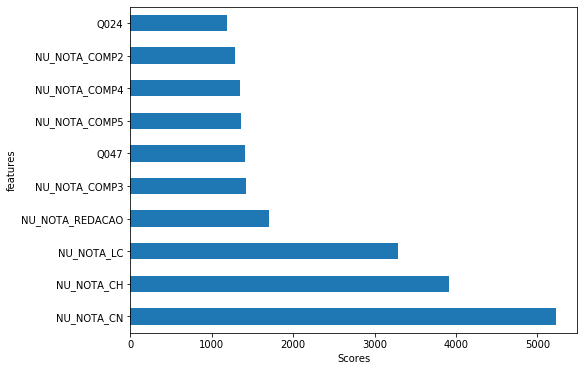

In [169]:
feature_scores.nlargest(10).plot(kind = 'barh', figsize = (8,6))
plt.ylabel('features')
plt.xlabel('Scores')

In [170]:
feature_scores.nlargest(10)

NU_NOTA_CN         5225.332922
NU_NOTA_CH         3913.254005
NU_NOTA_LC         3282.620475
NU_NOTA_REDACAO    1703.262710
NU_NOTA_COMP3      1417.130443
Q047               1407.463441
NU_NOTA_COMP5      1353.835847
NU_NOTA_COMP4      1344.429824
NU_NOTA_COMP2      1286.180141
Q024               1184.987916
dtype: float64

In [171]:
df_few_features = df_dummies.loc[:, ['NU_NOTA_CN',
                                  'NU_NOTA_CH',
                                  'NU_NOTA_LC',
                                  'NU_NOTA_REDACAO',
                                 'NU_NOTA_COMP3',
                                 'Q047',
                                 'NU_NOTA_COMP5',
                                 'NU_NOTA_COMP4',
                                 'NU_NOTA_COMP2',
                                 'Q024'
                                 ]]

In [172]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    
    'RandromForest': RandomForestRegressor(random_state = seed),
    'GradientBoost': GradientBoostingRegressor(random_state = seed),
    'BagginRegressor': BaggingRegressor(random_state = seed),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state = seed),

    'SVM' : SVR()
}

for key, model in models.items():
    score = cross_val_score(model, df_few_features, Y, cv=10, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score)
    rmse_score = round(np.mean(rmse), 2)
    print('RMSE score is {1}'.format( rmse_score))



RMSE score with CV of Linear Regression is 76.18
RMSE score with CV of Lasso is 76.19
RMSE score with CV of Ridge is 76.18
RMSE score with CV of ElasticNet is 76.37
RMSE score with CV of RandromForest is 78.78
RMSE score with CV of GradientBoost is 73.87
RMSE score with CV of BagginRegressor is 78.79
RMSE score with CV of GradientBoostingRegressor is 73.87
RMSE score with CV of SVM is 102.05


In both cases The gradientBoosting give us the best result. So I will choose this model to tune.

RMSE score for Lasso is 74.98 with std of 1.6485514590187016



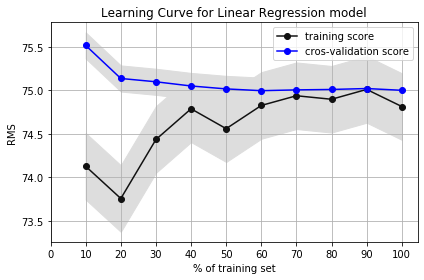


RMSE score for Ridge is 74.58 with std of 2.0552013190859344



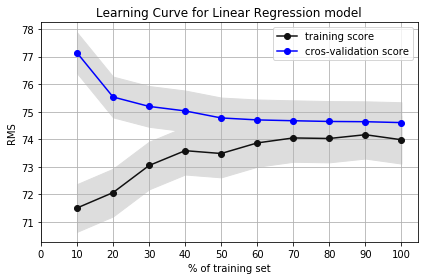


RMSE score for ElasticNet is 75.54 with std of 1.5546484803535912



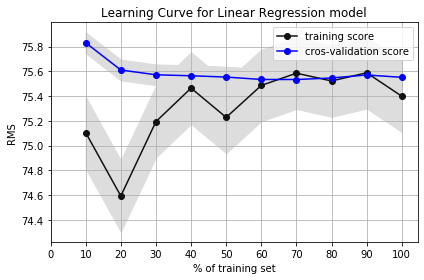


RMSE score for RandromForest is 76.75 with std of 1.598577433533163



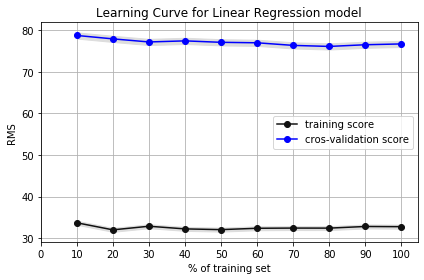


RMSE score for GradientBoost is 72.0 with std of 1.8324717340148382



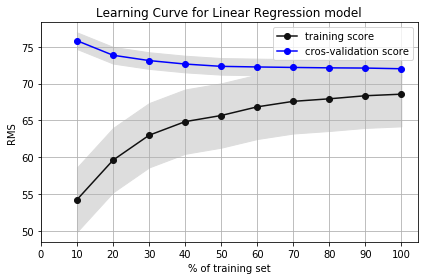


RMSE score for BagginRegressor is 76.56 with std of 1.3194761972467413



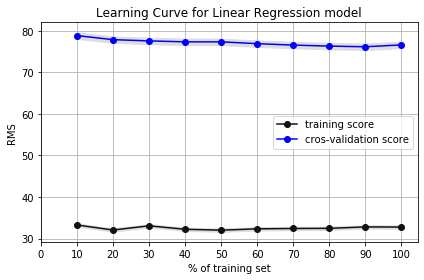


RMSE score for SVM is 102.05 with std of 2.538359083085712



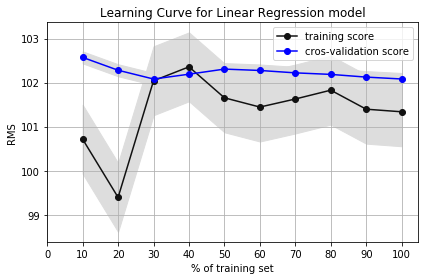

In [303]:
#unscaled 
models = create_base_models()
names, results = evaluate_models(df_dummies, Y, models, learning_curve_=True)